In [81]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, roc_curve, auc
import seaborn as sns

In [2]:
data = pd.read_csv('oasis_longitudinal.csv')

In [3]:
data.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


In [4]:
data['M/F'] = [1 if each == "M" else 0 for each in data['M/F']]
data['Group'] = [1 if each == "Demented" or each == "Converted" else 0 for each in data['Group']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    int64  
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    int64  
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(7), object(3)
memory usage: 43.8+ KB


In [5]:
median = data['MMSE'].median()
data['MMSE'].fillna(median, inplace=True)
data.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           0
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [6]:
median = data['SES'].median()
data['SES'].fillna(median, inplace=True)
data.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [7]:
y = data['Group'].values
X = data[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]

In [18]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size= 0.20, random_state=42, stratify=y)


df_ytrain = pd.DataFrame(y_trainval)
df_ytest = pd.DataFrame(y_test)

print('In Training Split:')
print(df_ytrain[0].value_counts())

print('\nIn Testing Split:')
print(df_ytest[0].value_counts())

In Training Split:
0    152
1    146
Name: 0, dtype: int64

In Testing Split:
0    38
1    37
Name: 0, dtype: int64


In [19]:
scaler = StandardScaler().fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)

In [20]:
X_trainval_scaled

array([[-0.87966444,  0.38449006, -0.87500081, ..., -0.30880564,
         0.16961408,  0.21548547],
       [ 1.13679712,  1.04832574, -0.87500081, ...,  1.23805919,
        -0.67676996, -1.21558429],
       [-0.87966444, -0.9431813 , -1.22928103, ..., -1.08511327,
         0.4605586 ,  1.14751551],
       ...,
       [-0.87966444, -0.01381135,  1.2506805 , ..., -0.92985174,
         0.01091708,  0.94202857],
       [-0.87966444, -1.20871557, -0.87500081, ..., -0.00978344,
         0.5663566 , -0.10742258],
       [-0.87966444,  0.11895579,  1.2506805 , ..., -1.38413547,
         0.4605586 ,  1.56582821]])

In [21]:
X_trainval.describe()

,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,0.436242,77.104027,14.469799,2.489933,27.355705,1483.701342,0.730587,1.198638
std,0.496752,7.544654,2.827372,1.116859,3.689231,174.192649,0.037871,0.136491
min,0.000000,60.000000,6.000000,1.000000,4.000000,1106.000000,0.644000,0.883000
25%,0.000000,71.250000,12.000000,2.000000,27.000000,1357.000000,0.699250,1.107250
50%,0.000000,77.000000,14.000000,2.000000,29.000000,1462.000000,0.731000,1.200500
75%,1.000000,82.000000,16.000000,3.000000,30.000000,1585.250000,0.757000,1.293000
max,1.000000,96.000000,23.000000,5.000000,30.000000,1987.000000,0.837000,1.587000


In [24]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_trainval_scaled, y_trainval)

SVC(random_state=42)

In [27]:
acc = clf_svm.score(X_test_scaled, y_test)*100
print("SVM Test Accuracy {:.2f}%".format(acc))

SVM Test Accuracy 74.67%


In [28]:
y_pred = clf_svm.predict(X_test_scaled)

In [29]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[34  4]
 [15 22]]


Confusion matrix, without normalization
[[34  4]
 [15 22]]


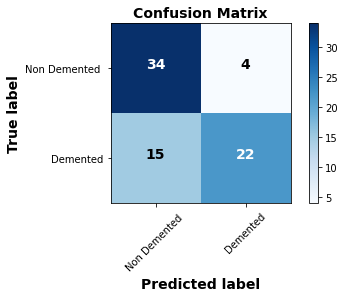

In [30]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Dementia prediction using SVM',
                          cmap=plt.cm.Blues,fontweight='bold'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontweight='bold', fontsize = '14')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",fontweight='bold',fontsize = '14',
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontweight='bold', fontsize = '14')
    plt.xlabel('Predicted label', fontweight='bold', fontsize = '14')
cm_plot_labels = ['Non Demented ','Demented']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix',fontweight='bold')

In [31]:
param_grid = [
    {'C': [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 30, 50, 80, 100],
    'gamma': ['scale', 0.5, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
]

optimal_params = GridSearchCV(SVC(),
                             param_grid,
                             cv=5, 
                             scoring='accuracy',
                             verbose=0,
                             n_jobs=-1)

optimal_params.fit(X_trainval_scaled, y_trainval)
print(optimal_params.best_params_)

{'C': 6, 'gamma': 1, 'kernel': 'rbf'}


In [32]:
C = optimal_params.best_params_['C']
gamma = optimal_params.best_params_['gamma']
kernel = optimal_params.best_params_['kernel']

In [33]:
clf_svm = SVC(random_state=42, C=C, gamma=gamma, kernel=kernel)
clf_svm.fit(X_trainval_scaled, y_trainval)

SVC(C=6, gamma=1, random_state=42)

In [34]:
acc = clf_svm.score(X_test_scaled, y_test)*100
print("SVM Test Accuracy {:.2f}%".format(acc))

SVM Test Accuracy 92.00%


In [78]:
y_pred = clf_svm.predict(X_test_scaled)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[35  3]
 [ 3 34]]


Confusion matrix, without normalization
[[35  3]
 [ 3 34]]


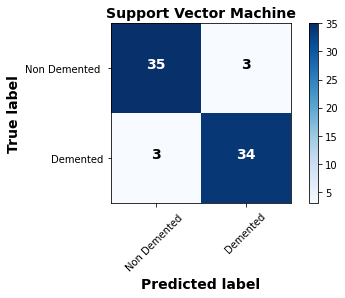

In [79]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Dementia prediction using SVM',
                          cmap=plt.cm.Blues,fontweight='bold'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontweight='bold', fontsize = '14')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",fontweight='bold',fontsize = '14',
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontweight='bold', fontsize = '14')
    plt.xlabel('Predicted label', fontweight='bold', fontsize = '14')
cm_plot_labels = ['Non Demented ','Demented']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Support Vector Machine',fontweight='bold')

In [38]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_trainval_scaled, y_trainval)

RandomForestClassifier(random_state=42)

In [39]:
acc = rfc.score(X_test_scaled, y_test)*100
print("Random forest Test Accuracy {:.2f}%".format(acc))

SVM Test Accuracy 81.33%


In [41]:
y_pred = rfc.predict(X_test_scaled)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[35  3]
 [11 26]]


Confusion matrix, without normalization
[[35  3]
 [11 26]]


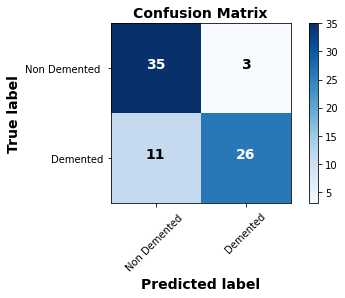

In [42]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Dementia prediction using SVM',
                          cmap=plt.cm.Blues,fontweight='bold'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontweight='bold', fontsize = '14')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",fontweight='bold',fontsize = '14',
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontweight='bold', fontsize = '14')
    plt.xlabel('Predicted label', fontweight='bold', fontsize = '14')
cm_plot_labels = ['Non Demented ','Demented']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix',fontweight='bold')

In [43]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]

max_features = ['auto', 'sqrt', 'log2']

max_depth = range(1,10)

criterion = ['gini']

bootstrap = [True, False]

In [44]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'criterion': criterion,
               'bootstrap': bootstrap}

In [45]:
optimal_params = GridSearchCV(RandomForestClassifier(),
                             param_grid,
                             cv=5, 
                             scoring='accuracy',
                             verbose=0,
                             n_jobs=-1)

optimal_params.fit(X_trainval_scaled, y_trainval)
print(optimal_params.best_params_)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 40}


In [46]:
bootstrap = optimal_params.best_params_['bootstrap']
criterion = optimal_params.best_params_['criterion']
max_depth = optimal_params.best_params_['max_depth']
max_features = optimal_params.best_params_['max_features']
n_estimators = optimal_params.best_params_['n_estimators']

In [47]:
rfc = RandomForestClassifier(n_estimators=n_estimators, 
                             max_features=max_features, 
                             max_depth=max_depth, 
                             criterion=criterion,
                             bootstrap=bootstrap,
                             random_state=42)

rfc.fit(X_trainval_scaled, y_trainval)

RandomForestClassifier(bootstrap=False, max_depth=9, max_features='sqrt',
                       n_estimators=40, random_state=42)

In [49]:
acc = rfc.score(X_test_scaled, y_test)*100
print("Random Forest Test Accuracy {:.2f}%".format(acc))

Random Forest Test Accuracy 81.33%


In [76]:
y_pred = rfc.predict(X_test_scaled)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[33  5]
 [ 9 28]]


Confusion matrix, without normalization
[[33  5]
 [ 9 28]]


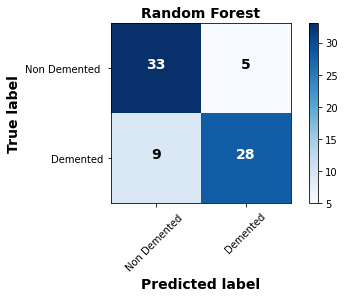

In [77]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Dementia prediction using SVM',
                          cmap=plt.cm.Blues,fontweight='bold'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontweight='bold', fontsize = '14')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",fontweight='bold',fontsize = '14',
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontweight='bold', fontsize = '14')
    plt.xlabel('Predicted label', fontweight='bold', fontsize = '14')
cm_plot_labels = ['Non Demented ','Demented']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Random Forest',fontweight='bold')

In [53]:
log_reg_model = LogisticRegression().fit(X_trainval_scaled, y_trainval)

In [54]:
acc = log_reg_model.score(X_test_scaled, y_test)*100
print("Random Forest Test Accuracy {:.2f}%".format(acc))

Random Forest Test Accuracy 74.67%


In [55]:
y_pred = log_reg_model.predict(X_test_scaled)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[30  8]
 [11 26]]


Confusion matrix, without normalization
[[30  8]
 [11 26]]


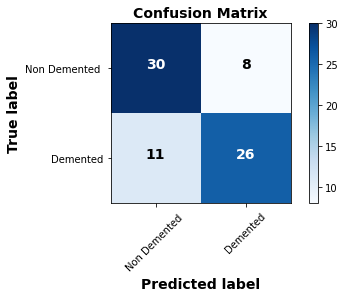

In [56]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Dementia prediction using SVM',
                          cmap=plt.cm.Blues,fontweight='bold'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontweight='bold', fontsize = '14')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",fontweight='bold',fontsize = '14',
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontweight='bold', fontsize = '14')
    plt.xlabel('Predicted label', fontweight='bold', fontsize = '14')
cm_plot_labels = ['Non Demented ','Demented']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix',fontweight='bold')

In [57]:
param_grid = {'penalty': ['l1','l2'], 
               'C': [0.001,0.01,0.1,1, 2, 3, 5, 10,100,1000]}

optimal_params = GridSearchCV(LogisticRegression(),
                             param_grid,
                             cv=5,
                             scoring='accuracy',
                             verbose=0,
                             n_jobs=-1)

optimal_params.fit(X_trainval_scaled, y_trainval)
print(optimal_params.best_params_)

{'C': 2, 'penalty': 'l2'}


In [58]:
best_C = optimal_params.best_params_['C']
best_penalty = optimal_params.best_params_['penalty']

In [59]:
log_reg_model = LogisticRegression(C=best_C, penalty=best_penalty).fit(X_trainval_scaled, y_trainval)

In [72]:
acc = log_reg_model.score(X_test_scaled, y_test)*100
print("Logistic regression Test Accuracy {:.2f}%".format(acc))

Logistic regression Test Accuracy 74.67%


In [74]:
y_pred = log_reg_model.predict(X_test_scaled)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[30  8]
 [11 26]]


Confusion matrix, without normalization
[[30  8]
 [11 26]]


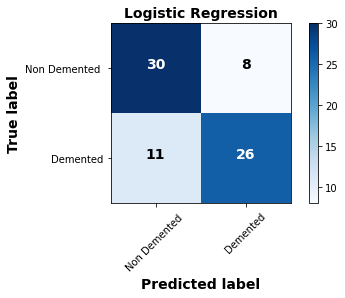

In [75]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Dementia prediction using SVM',
                          cmap=plt.cm.Blues,fontweight='bold'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontweight='bold', fontsize = '14')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",fontweight='bold',fontsize = '14',
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontweight='bold', fontsize = '14')
    plt.xlabel('Predicted label', fontweight='bold', fontsize = '14')
cm_plot_labels = ['Non Demented ','Demented']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Logistic Regression',fontweight='bold')

In [64]:
dt_model = DecisionTreeClassifier().fit(X_trainval_scaled, y_trainval)
acc = dt_model.score(X_test_scaled, y_test)*100
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 68.00%


In [66]:
y_pred = dt_model.predict(X_test_scaled)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[28 10]
 [14 23]]


In [67]:
param_grid = {'criterion': ['gini'], 
              'max_depth': range(1,10)}

optimal_params = GridSearchCV(DecisionTreeClassifier(),
                             param_grid,
                             cv=5, 
                             scoring='accuracy',
                             verbose=0,
                             n_jobs=-1)

optimal_params.fit(X_trainval_scaled, y_trainval)
print(optimal_params.best_params_)

{'criterion': 'gini', 'max_depth': 2}


In [68]:
criterion = optimal_params.best_params_['criterion']
max_depth = optimal_params.best_params_['max_depth']

In [69]:
dt_model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth).fit(X_trainval_scaled, y_trainval)
acc = dt_model.score(X_test_scaled, y_test)*100
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 80.00%


In [70]:
y_pred = dt_model.predict(X_test_scaled)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[38  0]
 [15 22]]


Confusion matrix, without normalization
[[38  0]
 [15 22]]


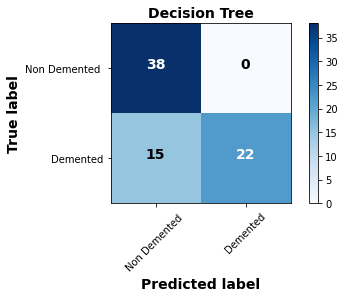

In [71]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Dementia prediction using SVM',
                          cmap=plt.cm.Blues,fontweight='bold'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontweight='bold', fontsize = '14')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",fontweight='bold',fontsize = '14',
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontweight='bold', fontsize = '14')
    plt.xlabel('Predicted label', fontweight='bold', fontsize = '14')
cm_plot_labels = ['Non Demented ','Demented']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Decision Tree',fontweight='bold')

In [133]:
knn_classifier = KNeighborsClassifier(n_neighbors = 1).fit(X_trainval_scaled, y_trainval)
acc = knn_classifier.score(X_test_scaled, y_test)*100
print("K nearest Neighbour Test Accuracy {:.2f}%".format(acc))

K nearest Neighbour Test Accuracy 92.00%


In [134]:
y_pred = knn_classifier.predict(X_test_scaled)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[37  1]
 [ 5 32]]


Confusion matrix, without normalization
[[37  1]
 [ 5 32]]


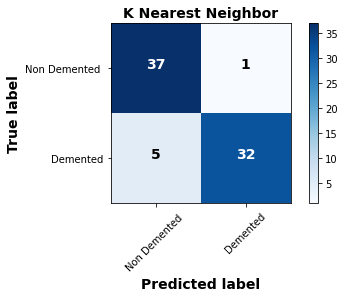

In [136]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Dementia prediction using SVM',
                          cmap=plt.cm.Blues,fontweight='bold'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontweight='bold', fontsize = '14')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",fontweight='bold',fontsize = '14',
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontweight='bold', fontsize = '14')
    plt.xlabel('Predicted label', fontweight='bold', fontsize = '14')
cm_plot_labels = ['Non Demented ','Demented']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='K Nearest Neighbor',fontweight='bold')

In [137]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: six==1.15.0 in c:\users\lenovo\anaconda3\lib\site-packages (from lazypredict) (1.15.0)



ERROR: tensorflow 2.3.1 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.1 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Lenovo\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5


In [ ]:
pip install numpy

In [ ]:
import nump as np